### NAME: Bùi Phương Thảo
### ID: 11215341
### Class: DSEB 63

#### PROBLEM 1: Re-implement t-SNE

#### Steps
* Compute pairwise distances between high-dimensional data points.
* Compute similarities between high-dimensional data points using a Gaussian distribution.
* Set the perplexity which determines the width of the Gaussian distribution.
* Compute the optimal bandwidth for each data point using binary search.
* Compute similarities between low-dimensional data points using a Student's t-distribution.
* Define a cost function based on the Kullback-Leibler divergence between the high-dimensional and low-dimensional similarity distributions.
* Compute the gradient of the cost function with respect to the low-dimensional data points.
* Update the low-dimensional data points using gradient descent with momentum. Here is some example code that demonstrates how to implement t-SNE from scratch in Python using NumPy:

In [1]:
import numpy as np

In [36]:
from itertools import combinations

In [43]:
def pairwise_distance(X):
    m,n = X.shape
    dis_matrix = np.zeros((m, m))

    for i, j in combinations(range(m), 2):
        # Compute the Euclidean distance between points i and j.
        distance = np.linalg.norm(X[i] - X[j])
        dis_matrix[i, j] = distance
        dis_matrix[j, i] = distance
#     dis_matrix = np.zeros((n,n))
#     for i in range(m):
#         for j in range(i+1,m):
#             distance = np.linalg.norm(X[i] - X[j])
#             dis_matrix[i,j] = distance
#             dis_matrix[j,i] = distance
    return dis_matrix

def gaussian_similarities(dis_matrix,variance):
    m = dis_matrix.shape[0]
    gaus_matrix = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            if i == j:
                continue
            p = np.exp(-(dis_matrix[i,j] ** 2) / (2 *variance**2))
            gaus_matrix[i,j] = p
            gaus_matrix[j,i] = p
    return gaus_matrix

def student_similarities(new_dim):
    m = new_dim.shape[0]
    t_matrix = np.zeros((m,m))
    D = pairwise_distance(new_dim)
    for i in range(m):
        for j in range(m):
            if i == j:
                continue
            d = 1/(1 + (D[i,j])**2)
            t_matrix[i,j] = d
            t_matrix[j,i] = d
    return t_matrix

def perplexity(gaus_matrix):
    entropy = - np.sum(gaus_matrix * np.log2(gaus_matrix), axis = 1)
    perplexity = 2 ** entropy
    return perplexity

def binary_search_perplex(gaus_matrix, given_perp, tolerance=1e-5, max_iter=1000):
    lower = 1e-20
    upper = 1e+20
    sigma = 1
    for i in range(max_iter):
        current_per = np.max(perplexity(gaussian_similarities(dis_matrix, sigma)))
        #current_per = perplexity(gaus_matrix)
        if abs(current_per - given_perp) < tolerance:
            break  # Break the loop if the perplexity is within the tolerance of the target.
            
        if current_per < given_perp:
            upper = sigma
            sigma = (sigma + lower) / 2
        else:
            lower = sigma
            sigma = (sigma + upper) / 2
    return sigma

def kl_divergence(gaus_matrix, t_matrix):
    m = gaus_matrix.shape[0]
    C = np.zeros(m)
    sum_gaus = np.sum(gaus_matrix)
    sum_t = np.sum(t_matrix)
    for i in range(m):
        for j in range(m):
            if gaus_matrix[i, j] == 0 or t_matrix[i, j] == 0:
                continue
            p_ij = gaus_matrix[i, j] / sum_gaus
            q_ij = t_matrix[i, j] / sum_t
            c = p_ij * np.log(p_ij / q_ij)
            C[i] += c
    return np.sum(C)

def gradient(gaus_matrix, t_matrix, new_dim, sigma):
    m, n = new_dim.shape
    grad = np.zeros_like(new_dim)

    for i in range(m):
        for j in range(m):
            if i != j:
                # Compute the pairwise difference in the low-dimensional space.
                diff = new_dim[i] - new_dim[j]
                # Compute the weight for the gradient.
                weight = 4 * (gaus_matrix[i, j] - t_matrix[i, j]) * (1 / (1 + np.linalg.norm(diff)**2 / (2 * sigma**2)))
                grad[i] += weight * diff
    return grad

def t_sne(X, num_dimensions=2, perplexity=30.0, learning_rate=200.0, num_iterations=1000):
    m, n = X.shape

    # Step 1: Compute pairwise distances in the high-dimensional space.
    dis_matrix = pairwise_distance(X)

    # Step 2: Initialize the low-dimensional representation randomly.
    new_dim = np.random.randn(m, num_dimensions)

    # Step 3: Compute the optimal bandwidth for each data point using binary search.
    sigma = binary_search_perplex(gaussian_similarities(dis_matrix, 1.0), perplexity)

    # Step 4: Perform t-SNE iterations.
    for iteration in range(num_iterations):
        # Step 5: Compute similarities in the low-dimensional space using a Student's t-distribution.
        t_matrix = student_similarities(new_dim)

        # Step 6: Compute the gradient of the cost function.
        grad = gradient(gaussian_similarities(dis_matrix, sigma), t_matrix, new_dim, sigma)

        # Step 7: Update the low-dimensional representation.
        new_dim -= learning_rate * grad

    return new_dim

In [7]:
from sklearn import datasets
data = datasets.load_digits()

In [8]:
digit = data.data
target = data.target
label = data.target_names

In [10]:
import pandas as pd

In [12]:
df = pd.DataFrame(digit)
df.columns = data.feature_names
y1 = pd.Series(target)
df['target'] = y1
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [14]:
import matplotlib.pyplot as plt

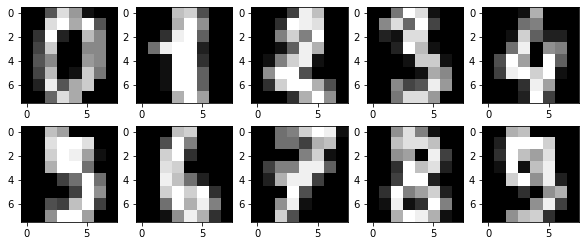

In [15]:
digit2 = data.images
plt.figure(figsize=(10, 4))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    img = digit2[i-1]
    # And displaying the image
    plt.imshow(img, cmap="gray")

In [16]:
def pca(X,n):
    #X(M,N)
    #Step 1: mean-centering matrix
    mean = np.mean(X,axis = 0)
    X_mean = X - mean
    
    #Step 2: Calculate covariance matrix
    cov = np.cov(X_mean, rowvar = False) #cov (NxN)
    
    #Step 3: Compute eigenvalue and eigenvector 
    eival, eivec = np.linalg.eigh(cov,UPLO = 'U') #eivec(NxN)
    #eivec = eivec.T
    
    #Step 4: Sort them in descending order
    sorted_index = np.argsort(eival)[::-1]
    sorted_eival = eival[sorted_index]
    sorted_vector = eivec[:,sorted_index]
    #sorted_vector = eivec[sorted_index]
    
    #Step 5: Select a subset
    subset = sorted_vector[:,0:n] #subset(N,D)
    #subset = sorted_vector[0:n]  #subset(N,D)
    #Step 6: Transform data 
    X_reduced = np.dot(X_mean,subset)
    return X_reduced

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

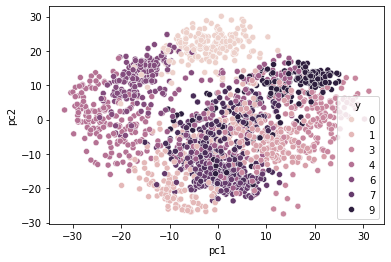

In [19]:
pca2 = pca(digit,2)
di_df = pd.DataFrame(pca2,columns = ['pc1','pc2'])
di_df['y'] = y1
sns.scatterplot(di_df, x = 'pc1', y = 'pc2', hue = 'y')

In [20]:
pca3 = pca(digit,3)

In [23]:
di3_df = pd.DataFrame(pca3,columns = ['pc1','pc2','pc3'])
di3_df['y'] = y1
# sns.scatter3D (di_df, x = 'pc1', y = 'pc2', z ='pc3', hue = 'y')

<Figure size 432x288 with 0 Axes>

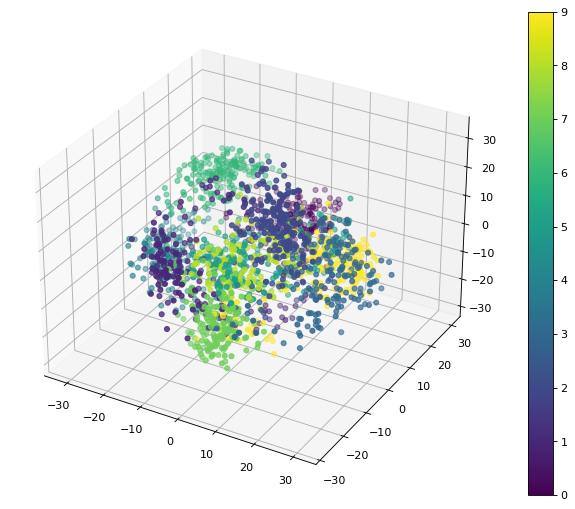

In [30]:
fig = plt.figure()
fig = plt.figure(figsize = (12, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')
plot = ax.scatter3D(di3_df['pc1'],di3_df['pc2'],di3_df['pc3'],c = di3_df['y'])
cbar = plt.colorbar(plot)
plt.show()

In [44]:
tsne2 = t_sne(digit,2)

NameError: name 'dis_matrix' is not defined

In [33]:
digit.shape

(1797, 64)

In [49]:
import numpy as np
from itertools import combinations

def pairwise_distance(X):
    """Compute pairwise distances between high-dimensional data points."""
    m, n = X.shape
    dis_matrix = np.zeros((m, m))

    for i, j in combinations(range(m), 2):
        # Compute the Euclidean distance between points i and j.
        distance = np.linalg.norm(X[i] - X[j])
        dis_matrix[i, j] = distance
        dis_matrix[j, i] = distance

    return dis_matrix

def gaussian_similarities(dis_matrix, variance):
    """Compute similarities between high-dimensional data points using a Gaussian distribution."""
    m = dis_matrix.shape[0]
    gaus_matrix = np.zeros((m, m))

    for i in range(m):
        for j in range(m):
            if i == j:
                continue
            p = np.exp(-(dis_matrix[i, j] ** 2) / (2 * variance ** 2))
            gaus_matrix[i, j] = p
            gaus_matrix[j, i] = p

    return gaus_matrix

def student_similarities(new_dim):
    """Compute similarities between low-dimensional data points using a Student's t-distribution."""
    m = new_dim.shape[0]
    t_matrix = np.zeros((m, m))
    D = pairwise_distance(new_dim)

    for i, j in combinations(range(m), 2):
        d = 1 / (1 + (D[i, j]) ** 2)
        t_matrix[i, j] = d
        t_matrix[j, i] = d

    return t_matrix

def perplexity(gaus_matrix):
    """Compute the perplexity of the conditional probability distribution."""
    entropy = - np.sum(gaus_matrix * np.log2(gaus_matrix + 1e-12), axis=1)
    perplexity = 2 ** entropy
    return perplexity

def binary_search_perplex(gaus_matrix, given_perp, tolerance=1e-5, max_iter=1000):
    """Perform binary search to find the optimal bandwidth for the Gaussian kernel."""
    lower = 1e-20
    upper = 1e+20
    sigma = 1

    for i in range(max_iter):
        #current_per = np.max(perplexity(gaussian_similarities(dis_matrix, sigma)))
        current_per = np.max(perplexity(gaus_matrix))

        if abs(current_per - given_perp) < tolerance:
            break  # Break the loop if the perplexity is within the tolerance of the target.

        if current_per < given_perp:
            upper = sigma
            sigma = (sigma + lower) / 2
        else:
            lower = sigma
            sigma = (sigma + upper) / 2

    return sigma

def kl_divergence(gaus_matrix, t_matrix):
    """Compute the Kullback-Leibler divergence between two similarity distributions."""
    m = gaus_matrix.shape[0]
    C = np.zeros(m)
    sum_gaus = np.sum(gaus_matrix)
    sum_t = np.sum(t_matrix)

    for i, j in combinations(range(m), 2):
        if gaus_matrix[i, j] == 0 or t_matrix[i, j] == 0:
            continue
        p_ij = gaus_matrix[i, j] / sum_gaus
        q_ij = t_matrix[i, j] / sum_t
        c = p_ij * np.log(p_ij / q_ij)
        C[i] += c

    return np.sum(C)

def gradient(gaus_matrix, t_matrix, new_dim, sigma):
    """Compute the gradient of the cost function."""
    m, n = new_dim.shape
    grad = np.zeros_like(new_dim)

    for i, j in combinations(range(m), 2):
        # Compute the pairwise difference in the low-dimensional space.
        diff = new_dim[i] - new_dim[j]
        # Compute the weight for the gradient.
        weight = 4 * (gaus_matrix[i, j] - t_matrix[i, j]) * (1 / (1 + np.linalg.norm(diff) ** 2 / (2 * sigma ** 2)))
        grad[i] += weight * diff

    return grad

def t_sne1(X, num_dimensions=2, perplexity=30.0, learning_rate=200.0, num_iterations=1000):
    m, n = X.shape

    # Step 1: Compute pairwise distances in the high-dimensional space.
    dis_matrix = pairwise_distance(X)

    # Step 2: Initialize the low-dimensional representation randomly.
    new_dim = np.random.randn(m, num_dimensions)

    # Step 3: Compute the optimal bandwidth for each data point using binary search.
    sigma = binary_search_perplex(gaussian_similarities(dis_matrix, 1.0), perplexity)

    # Step 4: Perform t-SNE iterations.
    for iteration in range(num_iterations):
        # Step 5: Compute similarities in the low-dimensional space using a Student's t-distribution.
        t_matrix = student_similarities(new_dim)

        # Step 6: Compute the gradient of the cost function.
        grad = gradient(gaussian_similarities(dis_matrix, sigma), t_matrix, new_dim, sigma)

        # Step 7: Update the low-dimensional representation.
        new_dim -= learning_rate * grad

    return new_dim

# Example usage:
# X = your_high_dimensional_data
# Y = t_sne(X)


In [50]:
tsne1 = t_sne1(digit,2)

KeyboardInterrupt: 

In [ ]:
tsne1